# Mundo 11 - Histograma, dispersão e boxsplot

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from bcb import sgs
import matplotlib.ticker as mtick
import matplotlib.dates as mdate
from datetime import datetime
from datetime import timedelta
import yfinance as yf
import matplotlib as mpl
import matplotlib.pylab as lab
import mplcyberpunk

In [3]:
cotacoes = yf.download(["WEGE3.SA"])['Close']

retornos_diarios = cotacoes.pct_change().dropna()

[*********************100%***********************]  1 of 1 completed


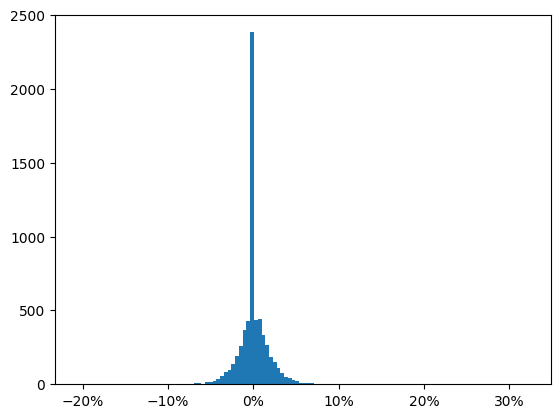

In [4]:
#histograma

fig, ax = plt.subplots()

ax.hist(retornos_diarios.values, bins = 120)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1, decimals = 0))

plt.show()

In [6]:
cotacoes = yf.download(["WEGE3.SA", "^BVSP"])['Close']

retornos_anuais = cotacoes.resample("Y").last().pct_change().dropna()

retornos_anuais['Ano'] = retornos_anuais.index.year

retornos_anuais

[*********************100%***********************]  2 of 2 completed
C:\Users\João Felipe\AppData\Local\Temp\ipykernel_17132\2497905292.py:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  retornos_anuais = cotacoes.resample("Y").last().pct_change().dropna()


Ticker,WEGE3.SA,^BVSP,Ano
Date,,,
2001-12-31,0.652540,-0.110164,2001
2002-12-31,0.210258,-0.170128,2002
2003-12-31,1.118642,0.973376,2003
2004-12-31,0.530002,0.178090,2004
2005-12-31,-0.019607,0.277142,2005
2006-12-31,0.733333,0.329328,2006
2007-12-31,0.938462,0.436480,2007
2008-12-31,-0.493687,-0.412234,2008
2009-12-31,0.512026,0.826578,2009


In [7]:
plt.style.use("cyberpunk")

https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [8]:
def barra_discreta(vetor_categoria):
    
    cmap = lab.cm.cool  # define a cor
    cmaplist = [cmap(i) for i in range(cmap.N)]
    cmap = mpl.colors.LinearSegmentedColormap.from_list(
        'cmap escolhido', cmaplist, cmap.N)
    bounds = np.linspace(np.min(vetor_categoria), np.max(vetor_categoria) + 0.5, len(vetor_categoria) + 1)
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    
    return bounds, norm

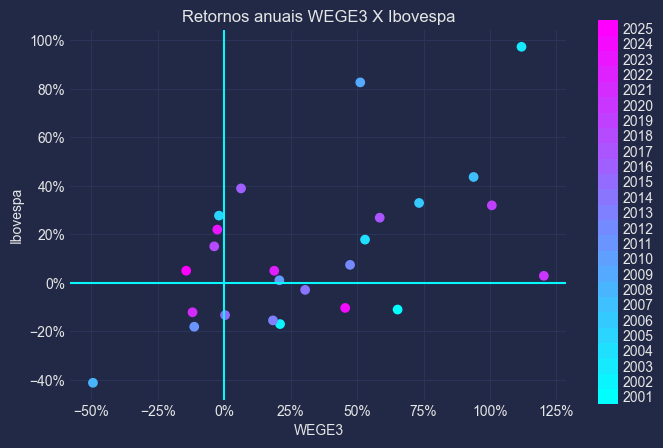

In [9]:
#Dispersão 

fig, ax = plt.subplots()

ax.scatter(retornos_anuais['WEGE3.SA'], retornos_anuais["^BVSP"], c = retornos_anuais['Ano'], cmap="cool")

bounds, norm = barra_discreta(retornos_anuais['Ano'])     

#cria um novo eixo pra barra

ax2 = fig.add_axes([0.95, 0.1, 0.03, 0.8])
cb = mpl.colorbar.ColorbarBase(ax2, cmap="cool", norm=norm,
    spacing='proportional', ticks=bounds + 0.5, boundaries=bounds, format='%1i')

ax.xaxis.set_major_formatter(mtick.PercentFormatter(1, decimals = 0))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals = 0))
ax.set_ylabel("Ibovespa")
ax.set_xlabel("WEGE3")
ax.axhline(y = 0)
ax.axvline(x = 0)
ax.set_title("Retornos anuais WEGE3 X Ibovespa")

plt.show()

# Replique essa estrutura pra qualquer gráfico que você quiser.

É impossível cobrir 100% de tudo de gráficos, utilize o google ao seu favor!
No limite, a única diferença vai ser um "ax.scatter" para um "ax.boxsplot"

In [ ]:
plt.style.use("default")

In [ ]:
cotacoes = yf.download(["WEGE3.SA", "^BVSP"])['Adj Close']

retornos_mensais = cotacoes.resample("M").last().pct_change().dropna()

In [ ]:
fig, ax = plt.subplots()

ax.boxplot(x = retornos_mensais)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals = 0))
ax.set_xticks([1, 2], ["WEGE3", "Ibovespa"])

plt.show()

# Exercícios

* Exercício 103: Crie um histograma com os retornos mensais da Petrobras.
* Exercício 104: Crie um gráfico de dispersão com os retornos anuais do S&P500 contra o Ibovespa.


[*********************100%***********************]  1 of 1 completed
C:\Users\João Felipe\AppData\Local\Temp\ipykernel_17132\774205896.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  retornos_diarios = cotacoes.resample("M").last().pct_change().dropna()


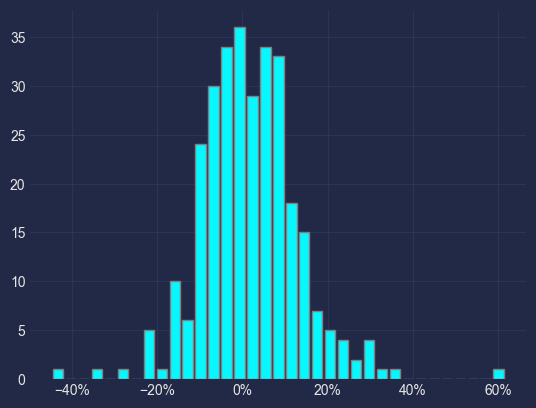

In [20]:
#103

cotacoes = yf.download(["PETR4.SA"])['Close']

retornos_diarios = cotacoes.resample("M").last().pct_change().dropna()

fig, ax = plt.subplots()

ax.hist(retornos_diarios.values, bins = 35, linewidth=1.0, edgecolor='grey', rwidth=0.8)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1, decimals = 0))

plt.show()

In [22]:
#104

plt.style.use("cyberpunk")

cotacoes = yf.download(["^GSPC", "^BVSP"])['Close']

retornos_anuais = cotacoes.resample("y").last().pct_change().dropna()

retornos_anuais['Ano'] = retornos_anuais.index.year

[*********************100%***********************]  2 of 2 completed
C:\Users\João Felipe\AppData\Local\Temp\ipykernel_17132\3387508137.py:7: FutureWarning: 'y' is deprecated and will be removed in a future version, please use 'YE' instead.
  retornos_anuais = cotacoes.resample("y").last().pct_change().dropna()


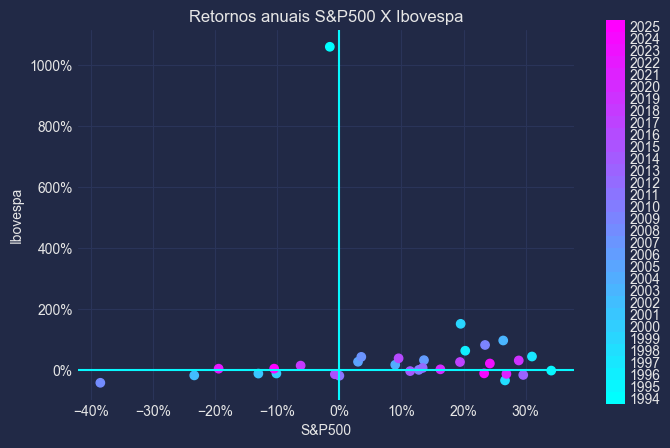

In [23]:
fig, ax = plt.subplots()

ax.scatter(retornos_anuais['^GSPC'], retornos_anuais["^BVSP"], c = retornos_anuais['Ano'], cmap="cool")

bounds, norm = barra_discreta(retornos_anuais['Ano'])     


ax2 = fig.add_axes([0.95, 0.1, 0.03, 0.8])
cb = mpl.colorbar.ColorbarBase(ax2, cmap="cool", norm=norm,
    spacing='proportional', ticks=bounds + 0.5, boundaries=bounds, format='%1i')

ax.xaxis.set_major_formatter(mtick.PercentFormatter(1, decimals = 0))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals = 0))
ax.set_ylabel("Ibovespa")
ax.set_xlabel("S&P500")
ax.axhline(y = 0)
ax.axvline(x = 0)
ax.set_title("Retornos anuais S&P500 X Ibovespa")

plt.show()